# Homework 1 ##

Through this homework, you'll practice the basics of data cleaning, data partition, data normalization, and data visualization.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the files attached with the assignment for the dataset links.

Alternative solutions are totally welcomed.



# Problem 1

Source: Built-in Titanic dataset





In [1]:
#Import the built-in Titanic dataset for this problem
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**TODO1:**
What is the average fare paid by passengers of each class who survived and those who didn’t survive?

In [2]:
# Solution:
# Group the dataset by 'survived' and 'pclass'
# Calculate the mean of the 'fare' column for each group
average_fare = titanic.groupby(["survived","pclass"])['fare'].mean()

# Display the average fare paid by passengers of each class who survived and those who didn’t
print(average_fare)

survived  pclass
0         1         64.684007
          2         19.412328
          3         13.669364
1         1         95.608029
          2         22.055700
          3         13.694887
Name: fare, dtype: float64


**TODO2:**
What is the median age of male and female passengers who did not survive?


In [3]:
#Solution:
# Filter the dataset for passengers who did not survive
non_survivors = titanic[titanic['survived'] == 0]

# Group by 'sex' and calculate the median age for those who did not survive
median_age_non_survivors = non_survivors.groupby('sex')['age'].median()

# Print the median age of male and female non survivors
print(median_age_non_survivors)


sex
female    24.5
male      29.0
Name: age, dtype: float64


**TODO3:**
Among all passengers, what is the gender distribution of those who were in 3rd class? Present the result as percentages in a pivot table.

In [4]:
#Solution:
# Create Pivot table for gender distribution in 3rd class
third_class_gender_distribution = titanic[titanic['pclass'] == 3].pivot_table(index='sex', values='pclass', aggfunc='count')

# Convert to percentage
third_class_gender_distribution_percentage = (third_class_gender_distribution / third_class_gender_distribution.sum()) * 100

# Print the result
print(third_class_gender_distribution_percentage)




           pclass
sex              
female  29.327902
male    70.672098


**TODO4:**
How many passengers aged 50 or older survived, and in which class were they seated? Provide a breakdown by class.

In [5]:
#Solution:
# Filter passengers aged 50 or older who survived
survived_50_plus = titanic[(titanic['age'] >= 50) & (titanic['survived'] == 1)]

# Group by class and count how many passengers survived in each class
survived_50_plus_by_class = survived_50_plus.groupby('pclass')['pclass'].count()

# Print the breakdown by class
print(survived_50_plus_by_class)



pclass
1    20
2     6
3     1
Name: pclass, dtype: int64


**TODO5:**
How many male passengers under the age of 18 from 2nd class did not survive?

In [6]:
#Solution:
# Filter male passengers under 18 belonging to 2nd class and did not survive
non_survivors_under_18 = titanic[(titanic['sex'] == 'male') & (titanic['age'] < 18) & (titanic['pclass'] == 2) & (titanic['survived'] == 0)]

# Print male passengers under 18 from 2nd class who did not survive
print(non_survivors_under_18)


     survived  pclass   sex   age  sibsp  parch  fare embarked   class  who  \
791         0       2  male  16.0      0      0  26.0        S  Second  man   
841         0       2  male  16.0      0      0  10.5        S  Second  man   

     adult_male deck  embark_town alive  alone  
791        True  NaN  Southampton    no   True  
841        True  NaN  Southampton    no   True  


**TODO6:**
Check whether the 'pclass' and 'class' variables contain the same information. Are there any redundant variables in the dataset? If so, drop them and present the updated dataset.

**Hint:** Compare the two columns (pclass and class) using a method like pd.factorize or LabelEncoder and check if they hold the same values.

In [7]:
#Solution:
import pandas as pd

#LabdeEncoder from sklearn is to encode categorical variables into a numerical format
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder on the 'class' column to convert it to numerical values
label_encoder = LabelEncoder()
titanic['class_encoded'] = label_encoder.fit_transform(titanic['class'])

# Display the 'class' and its encoded values
print("Class and Encoded Values:")
print(titanic[['class', 'class_encoded']].head())

# Compare 'pclass' with 'class_encoded' (adding 1 to class_encoded to match pclass)
# 'pclass' has values 1, 2, 3 and 'class_encoded' has 0, 1, 2, so are adding 1 to 'class_encoded'
print("Pclass values:")
print(titanic['pclass'].head())

print("Class Encoded + 1 values:")
print((titanic['class_encoded'] + 1).head())

comparison = (titanic['pclass'] == (titanic['class_encoded'] + 1))

# Check if all values in 'pclass' and 'class_encoded + 1' are the same
if comparison.all():
    print("The 'pclass' and 'class' columns contain the same information.")
    # Step 5: Drop 'class' and 'class_encoded' since they are redundant
    titanic_cleaned = titanic.drop(['class', 'class_encoded'], axis=1)
    print("The 'class' column has been dropped.")
else:
    print("The 'pclass' and 'class' columns are different.")
    titanic_cleaned = titanic

# Display the first 10 rows of the cleaned dataset to check
print("Updated Dataset:")
print(titanic_cleaned.head(10))


Class and Encoded Values:
   class  class_encoded
0  Third              2
1  First              0
2  Third              2
3  First              0
4  Third              2
Pclass values:
0    3
1    1
2    3
3    1
4    3
Name: pclass, dtype: int64
Class Encoded + 1 values:
0    3
1    1
2    3
3    1
4    3
Name: class_encoded, dtype: int64
The 'pclass' and 'class' columns contain the same information.
The 'class' column has been dropped.
Updated Dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked    who  \
0         0       3    male  22.0      1      0   7.2500        S    man   
1         1       1  female  38.0      1      0  71.2833        C  woman   
2         1       3  female  26.0      0      0   7.9250        S  woman   
3         1       1  female  35.0      1      0  53.1000        S  woman   
4         0       3    male  35.0      0      0   8.0500        S    man   
5         0       3    male   NaN      0      0   8.4583        Q    man   
6        

**TODO7:**
What is the survival rate for passengers with siblings or spouses aboard versus those who were alone? Present your findings through a pivot table.

**Hint:** Use the sibsp column to distinguish between passengers with and without siblings or spouses and calculate survival rates.

In [8]:
#Solution:

# Create a new column to identify passengers with or without siblings/spouses
titanic['Family_status'] = titanic['sibsp'].apply(lambda x: 'With Siblings/Spouse' if x > 0 else 'Alone')

# Create a pivot table to calculate survival rates
# 'survived' column contains 1 for survival, so the mean of this column gives the survival rate
pivot_table = pd.pivot_table(titanic, values='survived', index='Family_status', aggfunc='mean')

# Multiply by 100 to express survival rate as a percentage
pivot_table['survival_rate'] = pivot_table['survived'] * 100

# Print the pivot table with survival rates
print(pivot_table[['survival_rate']])



                      survival_rate
Family_status                      
Alone                     34.539474
With Siblings/Spouse      46.643110


# Problem 2
<b>Source</b> - Attached File(Cereals.csv)<br>
<b>Description</b> - This dataset offers comprehensive information on various breakfast cereals, focusing on their nutritional values, manufacturer, type (cold or hot), and an overall rating score. Key attributes include calories, protein, fat, sodium, fiber, carbohydrates, sugars, potassium, vitamins, and serving size (measured in cups and weight). It also identifies the manufacturer, supermarket shelf placement (top, middle, or bottom), and a computed rating that likely indicates the cereal's nutritional quality. The dataset is useful for comparing the health content of different cereals and examining their market positioning.

**TODO 1:** If a variable contains more than 5 missing records, impute the records by using the mean value of the variable.
If a variable contains less than 5 missing records, remove the missing values from the variable column.

In [41]:
#Importing Dataset
import pandas as pd
df=pd.read_csv("cereals.csv")

In [ ]:
#Solution

for column in df.columns:
  missing = df[column].isnull().sum()
  if missing > 5:
        df[column] = df[column].fillna(df[column].mean())
  else:
        df = df.dropna(subset=[column])

**TODO 2:** Check if all missing values are handled

In [45]:
#Solution:
df.isnull().sum()

,0
name,0
mfr,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0


**TODO 3:** Plot a boxplot for Potassium column and tell how you can deal with the outliers(along with reason)

*   Note: Please make sure your plots are complete and presentable with a title, proper axis names and legends if applicable.

In [49]:
import matplotlib.pyplot as plt

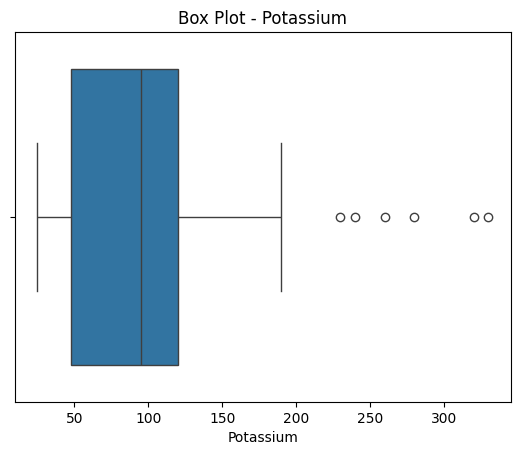

In [52]:
#Solution:
sns.boxplot(x = df['potass'])
plt.title('Box Plot - Potassium')
plt.xlabel('Potassium')
plt.show()

Outliers can be dealt in various ways, mostly domain knowledge is important when dealing with such cases.

- Outliers can be due to wrongly inputted/recorded data. In these cases, domain knowledge is important to decide if we should ignore and delete the data point.

- When the outliers are extreme data points, and skew the data distribution, it is a good approach to cap them, so to prevent any further analysis that may take place using the data.

- Outliers are not "wrong" data all the time, in many cases, they are just very unique "real" data, so ignoring and deleting those might not be a good option.
We can transform the outliers to fall under a certain range, for eg; replacing with maximum or minimum, applying logarithmic or sq root transformations.  

# Problem 3


<b>Source</b>-[Accidents.csv](https://northeastern.instructure.com/courses/193971/files/29213638?module_item_id=10857004)<br>
<b>Description</b>- 1) RushHour: Indicates whether the incident occurred during rush hour (1 = Yes, 0 = No).<br>
             2) WRK_ZONE: Represents whether the incident occurred in a work zone (1 = Yes, 0 = No)<br>
             3) WKDY:  Represents whether it was a weekday or not (1 = Yes, 0 = No).<br>
             4) INT_HWY: Indicates if the incident happened on an interstate highway (1 = Yes, 0 = No).<br>
             5) LGTCON_day: Represents light conditions at the time of the incident, likely categorizing whether it was
             daytime (1 = Daytime, 0 = Other).<br>
             6) LEVEL: Represents the severity level of the incident(1 = Severe, 0 = Not Severe).<br>
             7) SPD_LIM: The speed limit (in mph) where the incident took place.<br>
             8) SUR_COND_dry: Road surface condition, where 1 indicates dry and 0 indicates non-dry (wet, icy, etc.).<br>
             9) TRAF_two_way: Traffic condition, where 1 indicates two-way traffic and 0 indicates otherwise.<br>
            10) WEATHER_adverse: Describes adverse weather conditions during the incident (1 = Adverse weather, 0 = Clear or normal weather).<br>
            11) MAX_SEV: The severity of the incident, categorized into labels like "no-injury" and "non-fatal", suggesting the
             maximum severity of injuries.<br>

**TODO 1:** Plot a barplot between Average Speed Limit and Max Severity

In [53]:
df = pd.read_csv('accidents.csv')

Text(0, 0.5, 'Average Speed Limit (mph)')

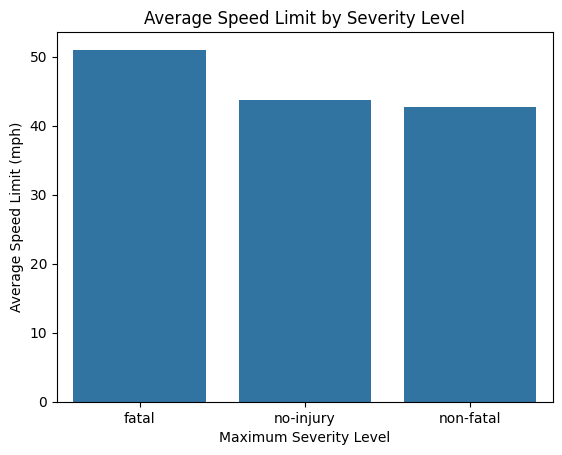

In [64]:
#Solution
avg_speed = df.groupby('MAX_SEV')['SPD_LIM'].mean().reset_index()

sns.barplot(x='MAX_SEV', y='SPD_LIM', data=avg_speed)


plt.title('Average Speed Limit by Severity Level')
plt.xlabel('Maximum Severity Level')
plt.ylabel('Average Speed Limit (mph)')

**TODO 2:** Do you see any issue with the plot which seems non reasonable

In [67]:
#Solution:


The plot shows that the average speed limit is highest for fatal accidents, which may seem counterintuitive as you'd expect higher speeds to correlate with more severe outcomes. The small difference between non-fatal and no-injury cases raises the question of whether other factors are influencing the severity of accidents.

**TODO 3:** Plot a boxplot between rush hour and speed limit

Text(0, 0.5, 'Speed Limit')

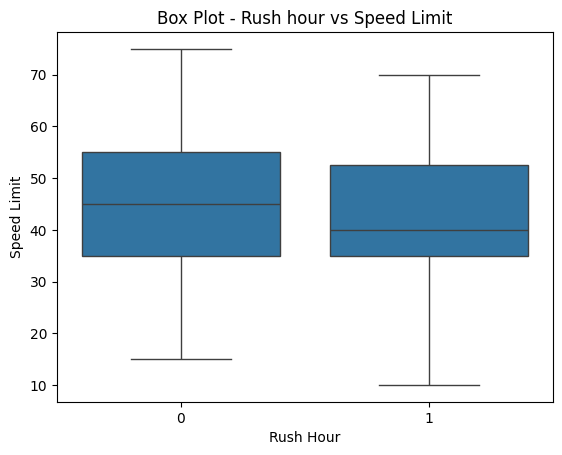

In [68]:
#Solution:
sns.boxplot(x = 'RushHour', y = 'SPD_LIM', data = df)
plt.title('Box Plot - Rush hour vs Speed Limit')
plt.xlabel('Rush Hour')
plt.ylabel('Speed Limit')

**TODO 4:** From above 2 visualizations what conditions are more prone to fatal injuries

In [ ]:
#Solution:


# Problem 4

**About Dataset**

- **Source:** [UniversalBank.csv](https://northeastern.instructure.com/courses/193971/files/29213725?module_item_id=10857061)

- **Description:** This dataset provides a comprehensive overview of customer information for a bank, focusing on both demographic details and financial activities. It includes data on customer characteristics such as age and experience, as well as their engagement with various banking products and services. The dataset is well-suited for exploring trends in customer behavior, financial decision-making, and the relationship between demographic factors and banking product usage.


In [ ]:
#Solution:
#Import the necessary libraries
import pandas as pd

#Load the dataset


**TODO 1:** Identify outliers using the IQR method

In [ ]:
#Solution:
#Calc IQR for Income


# Define the bounds for outliers in Income


# Identify outliers in the Income column


In [ ]:
#Solution:
# Output the result



**TODO 2:** Would you recommend removing, transforming, or keeping these outliers in the dataset? Justify your choice

**#Solution:**
- Enter your recommended approach:







**TODO 3:** Create a boxplot to visualize the distribution of the Income column

In [ ]:
#Solution:


**TODO 4:** Create a scatter plot to explore the relationship between Income and CCAvg (Credit Card Average).

In [ ]:
#Solution:
